In [ ]:
!pip install tensorflow==2.14.0

In [ ]:
!pip show keras

In [ ]:
import tensorflow
print(tensorflow.__version__)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(42)
from sklearn.metrics import confusion_matrix
from tensorflow import keras
#import keras
#from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
glaucoma_data=pd.read_csv('/content/gdrive/MyDrive/Drishti-GS1/Drishti-GS1_diagnosis.csv',header=0)
glaucoma_data.head(5)

Drishti-GS File  Patient ID  Marking 1  Marking 2  Marking 3  Marking 4  \
0   drishtiGS_001     1077987         -1         -1          1          1   
1   drishtiGS_002     1167573          1          1          1          1   
2   drishtiGS_003     1393265          1          1          1          1   
3   drishtiGS_004     1393265          1          1         -1          1   
4   drishtiGS_005     1481925          1          1          1          1   

   Additional Expert         Total  
0                  1  Glaucomatous  
1                  1  Glaucomatous  
2                  1  Glaucomatous  
3                  1  Glaucomatous  
4                  1  Glaucomatous

In [ ]:
glaucoma_data.shape

(101, 8)

In [ ]:
le = LabelEncoder()
le.fit(glaucoma_data['Total'])
LabelEncoder()
print(list(le.classes_))

['Glaucomatous', 'Normal']


In [ ]:
glaucoma_data['label']=le.transform(glaucoma_data['Total'])
print(glaucoma_data.sample(10))

   Drishti-GS File  Patient ID  Marking 1  Marking 2  Marking 3  Marking 4  \
84   drishtiGS_085     2829822         -1         -1          1          1   
55   drishtiGS_056     2617454          1          1          1          1   
66   drishtiGS_067     2737392          1         -1          1          1   
67   drishtiGS_068     2745345          1          1          1          1   
45   drishtiGS_046     2508068         -1         -1         -1          1   
39   drishtiGS_040     2396691          1          1          1          1   
22   drishtiGS_023     2070741          1         -1          1          1   
44   drishtiGS_045     2489693          1          1          1          1   
10   drishtiGS_011     1731185          1          1          1          1   
0    drishtiGS_001     1077987         -1         -1          1          1   

    Additional Expert         Total  label  
84                 -1        Normal      1  
55                 -1  Glaucomatous      0  
66    

In [ ]:
glaucoma_data.head(5)

Drishti-GS File  Patient ID  Marking 1  Marking 2  Marking 3  Marking 4  \
0   drishtiGS_001     1077987         -1         -1          1          1   
1   drishtiGS_002     1167573          1          1          1          1   
2   drishtiGS_003     1393265          1          1          1          1   
3   drishtiGS_004     1393265          1          1         -1          1   
4   drishtiGS_005     1481925          1          1          1          1   

   Additional Expert         Total  label  
0                  1  Glaucomatous      0  
1                  1  Glaucomatous      0  
2                  1  Glaucomatous      0  
3                  1  Glaucomatous      0  
4                  1  Glaucomatous      0

In [ ]:
glaucoma_data.shape

(101, 9)

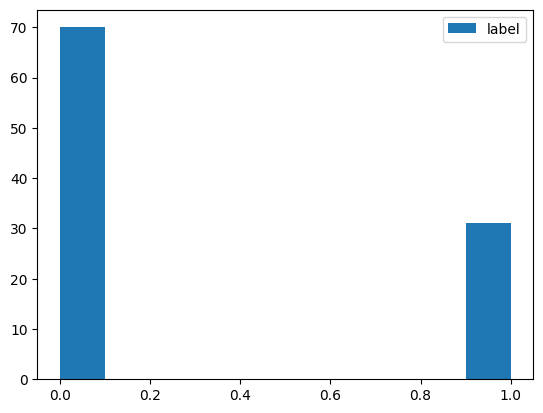

In [ ]:
plt.hist(glaucoma_data['label'],label='label')
plt.legend()

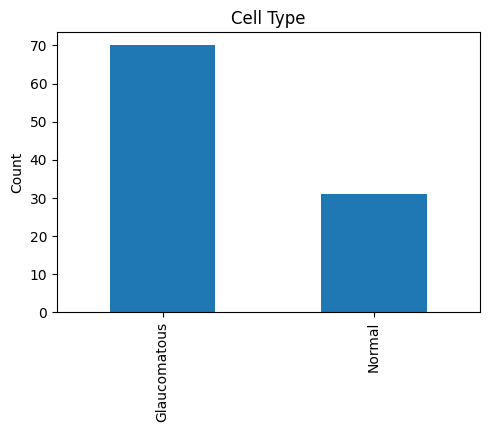

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
glaucoma_data['Total'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

In [ ]:
from sklearn.utils import resample

In [ ]:
print(glaucoma_data['label'].value_counts())

0    70
1    31
Name: label, dtype: int64


In [ ]:
df_0 = glaucoma_data[glaucoma_data['label']==0]
df_1 = glaucoma_data[glaucoma_data['label']==1]

In [ ]:
df_0.shape

(70, 9)

In [ ]:
n_samples = 500

In [ ]:
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
df_0_balanced.shape

(500, 9)

In [ ]:
data_glaucoma_balanced = pd.concat([df_0_balanced,df_1_balanced,])

In [ ]:
print(data_glaucoma_balanced['label'].value_counts())

0    500
1    500
Name: label, dtype: int64


In [ ]:
images_path = {os.path.splitext(os.path.basename(x))[0]: x
               for x in glob(os.path.join('/content/gdrive/MyDrive/Drishti-GS1/','*','*.png'))}

In [ ]:
print(images_path)

{'drishtiGS_002': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_002.png', 'drishtiGS_004': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_004.png', 'drishtiGS_008': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_008.png', 'drishtiGS_010': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_010.png', 'drishtiGS_012': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_012.png', 'drishtiGS_015': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_015.png', 'drishtiGS_016': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_016.png', 'drishtiGS_017': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_017.png', 'drishtiGS_018': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_018.png', 'drishtiGS_022': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_022.png', 'drishtiGS_024': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_024.png', 'drishtiGS_026': '/content/gdrive/MyDrive/Drishti-GS1/images/drishtiGS_026.png', 'drishtiGS_031': '/content/

In [ ]:
data_glaucoma_balanced['path'] = glaucoma_data['Drishti-GS File'].map(images_path.get)

In [ ]:
data_glaucoma_balanced.head()

Drishti-GS File  Patient ID  Marking 1  Marking 2  Marking 3  Marking 4  \
66   drishtiGS_067     2737392          1         -1          1          1   
20   drishtiGS_021     2040729          1          1          1          1   
76   drishtiGS_077     2804213          1         -1          1          1   
26   drishtiGS_027     2248277          1          1          1          1   
29   drishtiGS_030     2292498         -1          1          1          1   

    Additional Expert         Total  label  \
66                 -1  Glaucomatous      0   
20                  1  Glaucomatous      0   
76                 -1  Glaucomatous      0   
26                 -1  Glaucomatous      0   
29                  1  Glaucomatous      0   

                                                 path  
66  /content/gdrive/MyDrive/Drishti-GS1/images/dri...  
20  /content/gdrive/MyDrive/Drishti-GS1/images/dri...  
76  /content/gdrive/MyDrive/Drishti-GS1/images/dri...  
26  /content/gdrive/MyDrive/Drishti-GS1/images/dri...  
29  /content/gdrive/MyDrive/Drishti-GS1/images/dri...

In [ ]:
size = 256

In [ ]:
data_glaucoma_balanced['image'] = data_glaucoma_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((size,size))))

In [ ]:
data_glaucoma_balanced.head()

Drishti-GS File  Patient ID  Marking 1  Marking 2  Marking 3  Marking 4  \
66   drishtiGS_067     2737392          1         -1          1          1   
20   drishtiGS_021     2040729          1          1          1          1   
76   drishtiGS_077     2804213          1         -1          1          1   
26   drishtiGS_027     2248277          1          1          1          1   
29   drishtiGS_030     2292498         -1          1          1          1   

    Additional Expert         Total  label  \
66                 -1  Glaucomatous      0   
20                  1  Glaucomatous      0   
76                 -1  Glaucomatous      0   
26                 -1  Glaucomatous      0   
29                  1  Glaucomatous      0   

                                                 path  \
66  /content/gdrive/MyDrive/Drishti-GS1/images/dri...   
20  /content/gdrive/MyDrive/Drishti-GS1/images/dri...   
76  /content/gdrive/MyDrive/Drishti-GS1/images/dri...   
26  /content/gdrive/MyDrive/Drishti-GS1/images/dri...   
29  /content/gdrive/MyDrive/Drishti-GS1/images/dri...   

                                                image  
66  [[[4, 1, 3], [3, 1, 3], [3, 1, 3], [3, 1, 2], ...  
20  [[[3, 1, 3], [3, 1, 3], [3, 1, 3], [2, 1, 2], ...  
76  [[[3, 1, 3], [4, 1, 3], [3, 1, 3], [3, 1, 3], ...  
26  [[[4, 1, 3], [3, 1, 2], [4, 1, 3], [3, 1, 3], ...  
29  [[[3, 1, 3], [3, 1, 3], [3, 1, 3], [2, 1, 3], ...

In [ ]:
n_images = 4

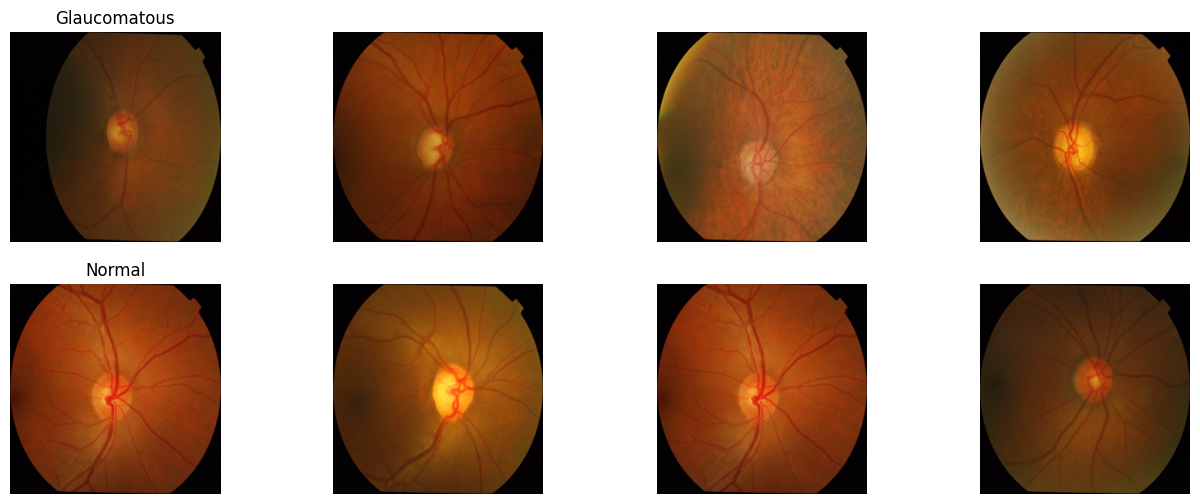

In [ ]:
fig, m_axs = plt.subplots(2, n_images, figsize = (4*n_images, 3*2))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         data_glaucoma_balanced.sort_values(['Total']).groupby('Total')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_images, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
X = np.asarray(data_glaucoma_balanced['image'].tolist())

In [ ]:
X.shape

(1000, 256, 256, 3)

In [ ]:
Y = data_glaucoma_balanced['label']

In [ ]:
Y.shape

(1000,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
x_train.shape

(750, 256, 256, 3)

In [ ]:
x_train, x_test =x_train/255, x_test/255

In [ ]:
x_train

In [ ]:
y_test_cat = to_categorical(y_test,num_classes=2)

In [ ]:
y_train_cat = to_categorical(y_train,num_classes=2)

#VGG16_model

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False,input_shape=(size,size,3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
for layer in VGG_model.layers:
  layer.trainable = False

In [ ]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
x =Flatten()(VGG_model.output)
x=Dense(512, activation=('relu'))(x)
x=Dense(256, activation=('relu'))(x)
prediction = Dense(2,activation='sigmoid')(x)
model_VGG16 = Model(inputs = VGG_model.input, outputs = prediction)
#model_VGG16 = Sequential()
#model_VGG16.add(VGG_model)
#model_VGG16.add(Flatten())
#model_VGG16.add(Dense(512, activation='relu'))
#model_VGG16.add(Dropout(0.2))
#model_VGG16.add(Dense(1,activation='softmax'))

In [ ]:
model_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

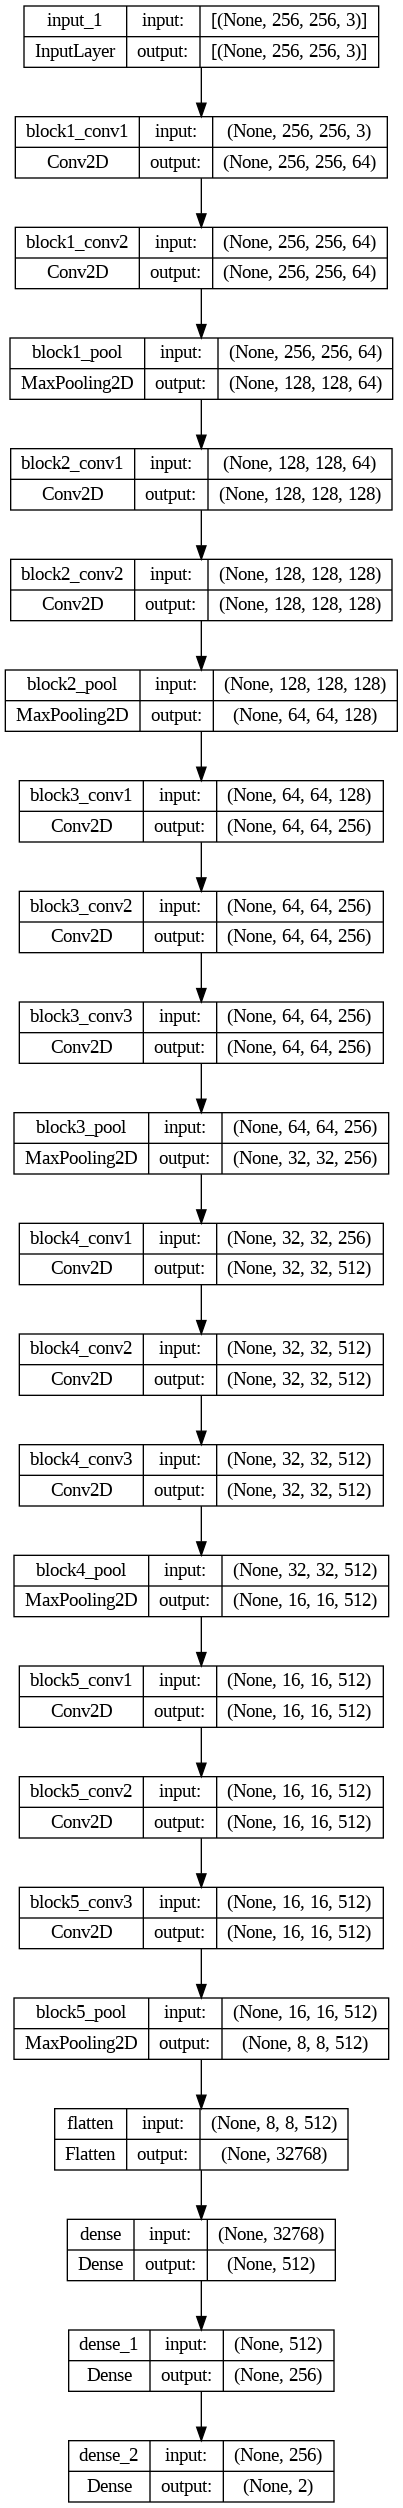

In [ ]:
from keras.src.utils.vis_utils import plot_model
plot_model(model=model_VGG16, show_shapes= True)

In [ ]:
model_VGG16.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history1 = model_VGG16.fit(x_train, y_train_cat, batch_size = 50, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
15/15 [==============================] - 24s 485ms/step - loss: 16.4809 - acc: 0.6773 - val_loss: 1.4179 - val_acc: 0.8560
Epoch 2/10
15/15 [==============================] - 5s 361ms/step - loss: 1.0805 - acc: 0.9293 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/10
15/15 [==============================] - 7s 453ms/step - loss: 0.0325 - acc: 0.9893 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/10
15/15 [==============================] - 5s 365ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 1.4305e-09 - val_acc: 1.0000
Epoch 5/10
15/15 [==============================] - 5s 366ms/step - loss: 8.4400e-08 - acc: 1.0000 - val_loss: 2.3174e-07 - val_acc: 1.0000
Epoch 6/10
15/15 [==============================] - 5s 371ms/step - loss: 4.1421e-07 - acc: 1.0000 - val_loss: 7.1095e-07 - val_acc: 1.0000
Epoch 7/10
15/15 [==============================] - 7s 462ms/step - loss: 7.0554e-07 - acc: 1.0000 - val_loss: 8.5923e-07 - val_acc: 1.0000
Epoch 8/10
15/15 [================

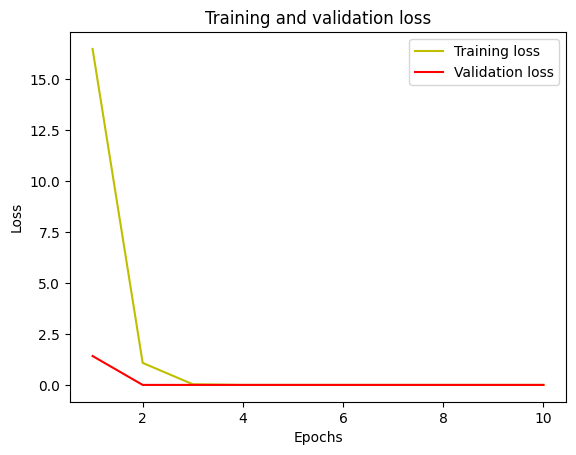

In [ ]:
loss = history1.history['loss']
val_loss_1 = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss_1, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

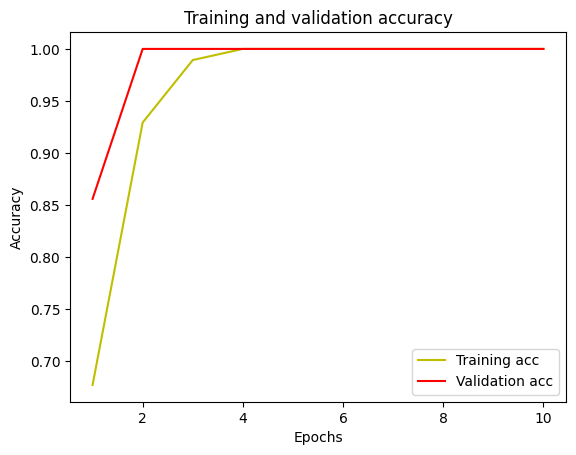

In [ ]:
acc = history1.history['acc']
val_acc_1 = history1.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc_1, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_VGG16.save('saved_models/model_VGG16.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
x_test.shape

(250, 256, 256, 3)

In [ ]:
pred_VGG16 = np.argmax(model_VGG16.predict(x_test),axis=-1)

8/8 [==============================] - 12s 847ms/step


In [ ]:
pred_VGG16.shape

(250,)

In [ ]:
pred_VGG16

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

90    1
32    1
6     1
41    1
1     0
     ..
3     0
78    0
79    0
54    0
22    0
Name: label, Length: 250, dtype: int64

In [ ]:
y_test.shape

(250,)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,recall_score,classification_report

In [ ]:
accuracy_VGG16 = accuracy_score(y_test, pred_VGG16)
auc_vgg16 = roc_auc_score(y_test,pred_VGG16)
se_vgg16 = recall_score(y_test,pred_VGG16)

In [ ]:
print('Accuracy Score = ', accuracy_VGG16*100,'%')
print('AUC = ', auc_vgg16*100,'%')
print('sensibility = ', se_vgg16*100,'%')

Accuracy Score =  100.0 %
AUC =  100.0 %
sensibility =  100.0 %


In [ ]:
f1_score_vgg16=f1_score(y_test, pred_VGG16)
print(f1_score_vgg16)

1.0


<Axes: >

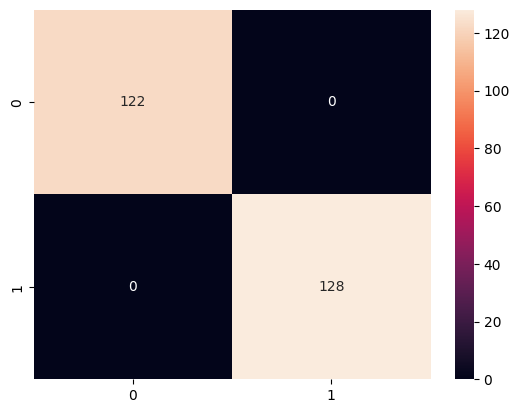

In [ ]:
cm_vgg16 = confusion_matrix(y_test, pred_VGG16)
sns.heatmap(cm_vgg16,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_vgg16.ravel()

In [ ]:
specificity_vgg16 = tn / (tn + fp)

In [ ]:
print(specificity_vgg16)

1.0


In [ ]:
report_vgg16 = classification_report(y_test,pred_VGG16)
print(report_vgg16)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



Text(0, 0.5, 'Fraction of incorrect predictions')

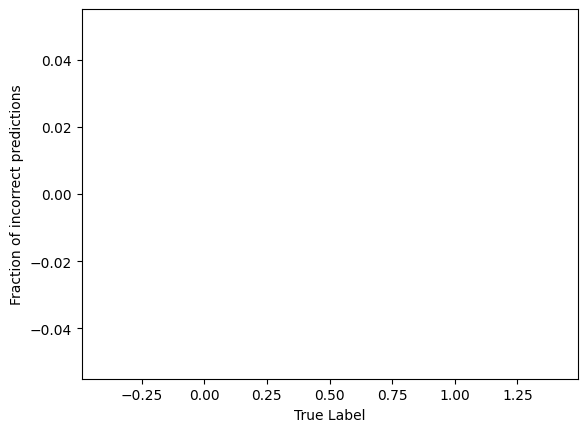

In [ ]:
incorr_fraction = 1 - np.diag(cm_vgg16) / np.sum(cm_vgg16, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

#MODEL 2 VGG 19

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
VGG19_model = VGG19(weights='imagenet', include_top=False,input_shape=(size,size,3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
VGG19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
for layer in VGG19_model.layers:
  layer.trainable = False

In [ ]:
VGG19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
y =Flatten()(VGG19_model.output)
y=Dense(512, activation=('relu'))(y)
y=Dense(256, activation=('relu'))(y)
prediction_2 = Dense(2,activation='sigmoid')(y)
model2_VGG19 = Model(inputs = VGG19_model.input, outputs = prediction_2)

In [ ]:
model2_VGG19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

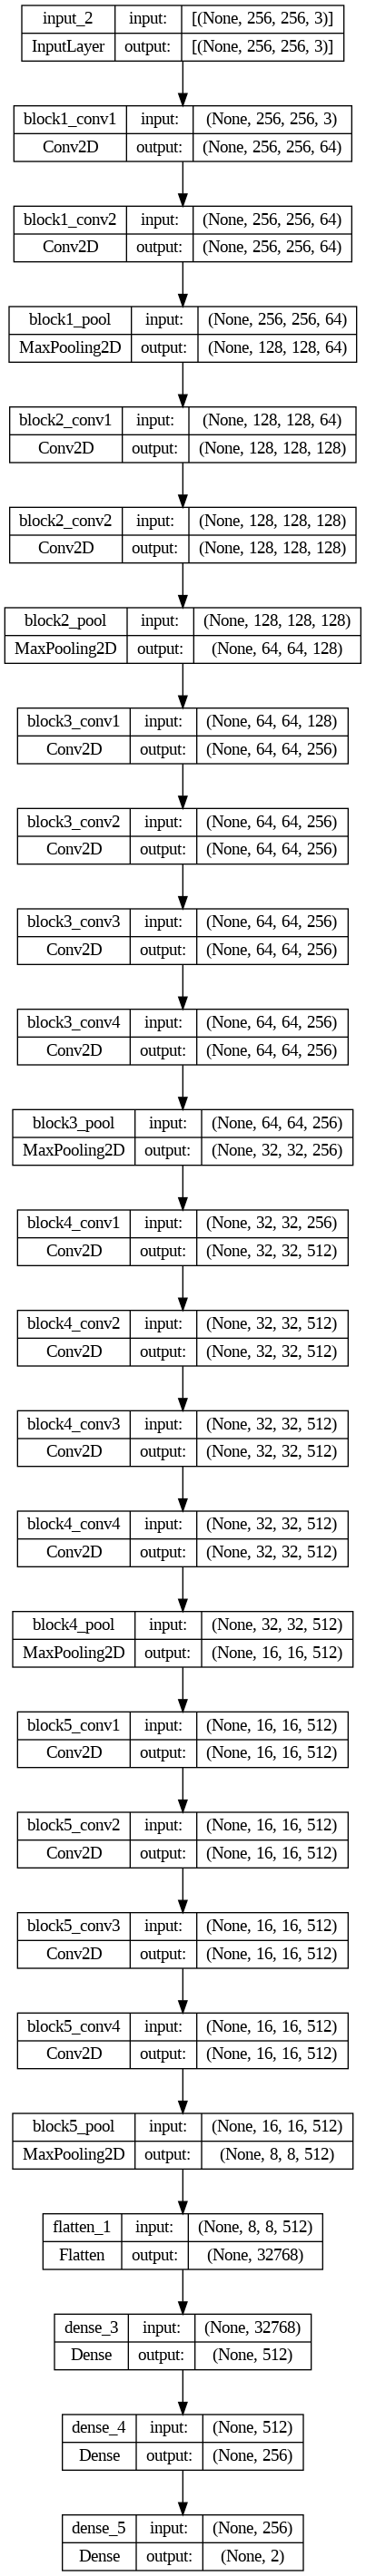

In [ ]:
plot_model(model=model2_VGG19, show_shapes= True)

In [ ]:
model2_VGG19.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history2 = model2_VGG19.fit(x_train, y_train_cat, batch_size = 50, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
15/15 [==============================] - 9s 483ms/step - loss: 9.1035 - acc: 0.8013 - val_loss: 0.1321 - val_acc: 0.9880
Epoch 2/10
15/15 [==============================] - 7s 471ms/step - loss: 0.1653 - acc: 0.9773 - val_loss: 0.4748 - val_acc: 0.9320
Epoch 3/10
15/15 [==============================] - 8s 533ms/step - loss: 0.0876 - acc: 0.9880 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/10
15/15 [==============================] - 7s 482ms/step - loss: 0.0065 - acc: 0.9987 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/10
15/15 [==============================] - 7s 474ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/10
15/15 [==============================] - 7s 472ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/10
15/15 [==============================] - 7s 467ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/10
15/15 [==========================

In [ ]:
model2_VGG19.save('saved_models/model2_VGG19.hdf5')

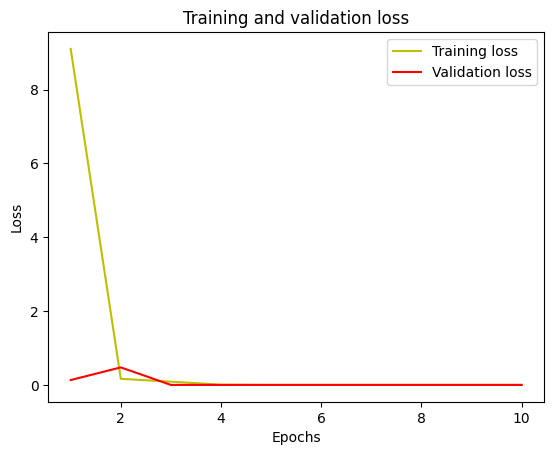

In [ ]:
loss = history2.history['loss']
val_loss_2 = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss_2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

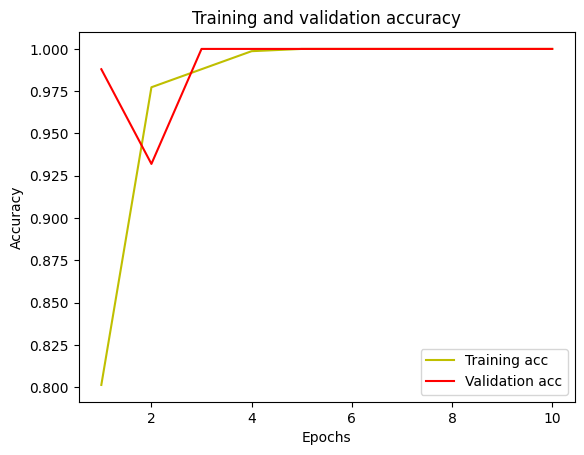

In [ ]:
acc = history2.history['acc']
val_acc_2 = history2.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc_2, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred2_VGG19 = np.argmax(model2_VGG19.predict(x_test),axis=-1)

8/8 [==============================] - 1s 187ms/step


In [ ]:
accuracy_VGG19 = accuracy_score(y_test, pred2_VGG19)
auc_vgg19 = roc_auc_score(y_test,pred2_VGG19)
se_vgg19 = recall_score(y_test,pred2_VGG19)

In [ ]:
print('Accuracy Score = ', accuracy_VGG19*100,'%')
print('AUC = ', auc_vgg19*100,'%')
print('sensibility = ', se_vgg19*100,'%')

Accuracy Score =  100.0 %
AUC =  100.0 %
sensibility =  100.0 %


In [ ]:
cm_vgg19 = confusion_matrix(y_test, pred2_VGG19)

<Axes: >

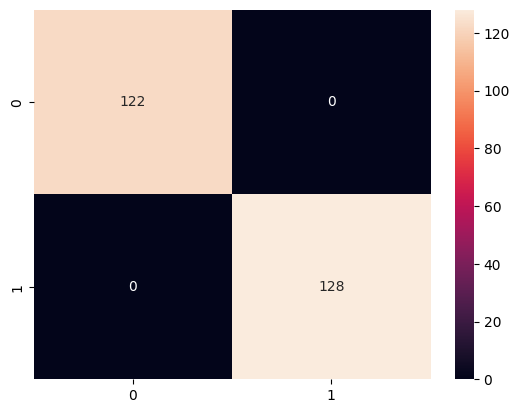

In [ ]:
sns.heatmap(cm_vgg19,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_vgg19.ravel()

In [ ]:
specificity_vgg19 = tn / (tn + fp)
print(specificity_vgg19)

1.0


In [ ]:
report_vgg19 = classification_report(y_test,pred2_VGG19)
print(report_vgg19)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



#Model 3 inception V3

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
Inception_V3_model =InceptionV3(weights='imagenet', include_top=False,input_shape=(size,size,3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in Inception_V3_model.layers:
  layer.trainable = False

In [ ]:
Inception_V3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

In [ ]:
z =Flatten()(Inception_V3_model.output)
z=Dense(1024, activation=('relu'))(z)
z=Dense(256, activation=('relu'))(z)
prediction_3 = Dense(2,activation='sigmoid')(z)
model3_inception_v3 = Model(inputs = Inception_V3_model.input, outputs = prediction_3)

In [ ]:
model3_inception_v3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0]

In [ ]:
plot_model(model=model3_inception_v3, show_shapes= True)

In [ ]:
model3_inception_v3.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history3 = model3_inception_v3.fit(x_train, y_train_cat, batch_size = 50, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
15/15 [==============================] - 13s 286ms/step - loss: 78.6601 - acc: 0.6533 - val_loss: 1.5882 - val_acc: 0.9080
Epoch 2/10
15/15 [==============================] - 3s 193ms/step - loss: 0.2942 - acc: 0.9720 - val_loss: 0.1896 - val_acc: 0.9800
Epoch 3/10
15/15 [==============================] - 3s 191ms/step - loss: 0.2100 - acc: 0.9880 - val_loss: 2.2982e-06 - val_acc: 1.0000
Epoch 4/10
15/15 [==============================] - 3s 235ms/step - loss: 0.1081 - acc: 0.9933 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/10
15/15 [==============================] - 3s 190ms/step - loss: 0.3110 - acc: 0.9907 - val_loss: 0.4796 - val_acc: 0.9680
Epoch 6/10
15/15 [==============================] - 3s 235ms/step - loss: 18.0347 - acc: 0.8067 - val_loss: 0.1653 - val_acc: 0.9880
Epoch 7/10
15/15 [==============================] - 3s 194ms/step - loss: 6.7017 - acc: 0.9333 - val_loss: 0.1093 - val_acc: 0.9960
Epoch 8/10
15/15 [==============================] - 3s 190ms/step

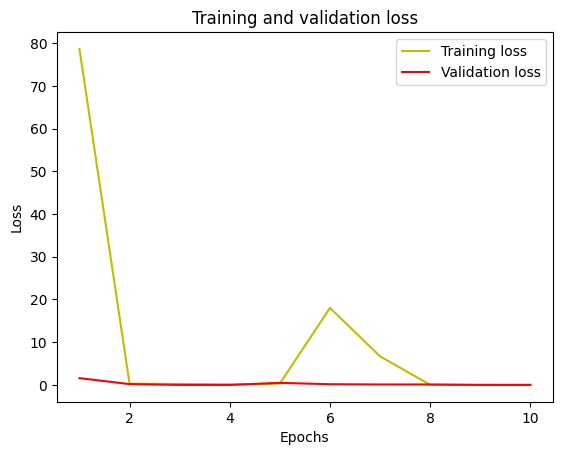

In [ ]:
loss = history3.history['loss']
val_loss_3 = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss_3, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

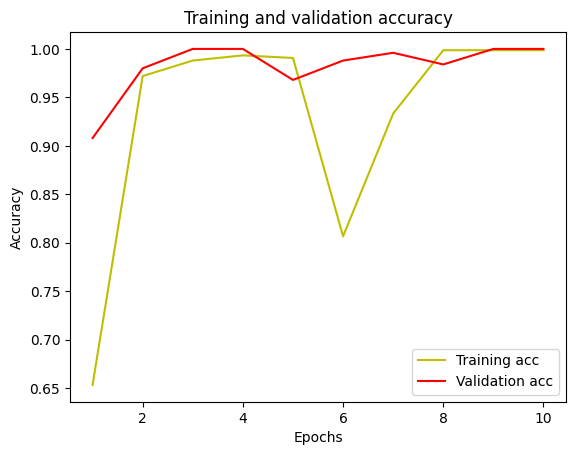

In [ ]:
acc = history3.history['acc']
val_acc_3 = history3.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc_3, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model3_inception_v3.save('saved_models/model3_inception_v3.hdf5')

In [ ]:
pred3_inception_v3 = np.argmax(model3_inception_v3.predict(x_test),axis=-1)

8/8 [==============================] - 6s 342ms/step


In [ ]:
accuracy_v3 = accuracy_score(y_test, pred3_inception_v3)
auc_v3 = roc_auc_score(y_test,pred3_inception_v3)
se_v3 = recall_score(y_test,pred3_inception_v3)

In [ ]:
print('Accuracy Score = ', accuracy_v3*100,'%')
print('AUC = ', auc_v3*100,'%')
print('sensibility = ', se_v3*100,'%')

Accuracy Score =  100.0 %
AUC =  100.0 %
sensibility =  100.0 %


In [ ]:
score = model3_inception_v3.evaluate(x_test,y_test_cat,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.0
accuracy =  1.0


<Axes: >

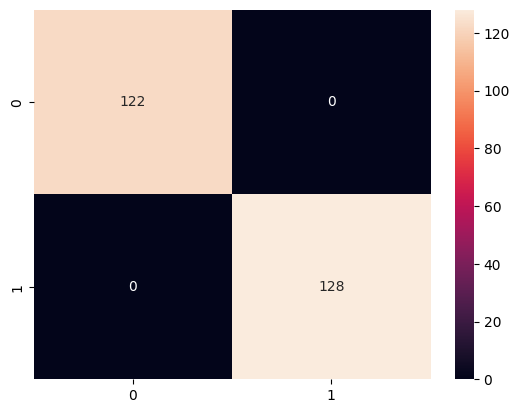

In [ ]:
cm_v3 = confusion_matrix(y_test, pred3_inception_v3)
sns.heatmap(cm_v3,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_v3.ravel()

In [ ]:
specificity_v3 = tn / (tn + fp)
print(specificity_v3)

1.0


In [ ]:
report_v3 = classification_report(y_test,pred3_inception_v3)
print(report_v3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



#Model 4 ResNet 50

In [ ]:
from keras.applications import ResNet50

In [ ]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(size,size,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
u =Flatten()(resnet_50.output)
u=Dense(1024, activation=('relu'))(u)
u=Dense(512, activation=('relu'))(u)
prediction_4 = Dense(2,activation='sigmoid')(u)
model4_resnet_50 = Model(inputs = resnet_50.input, outputs = prediction_4)

In [ ]:
model4_resnet_50.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

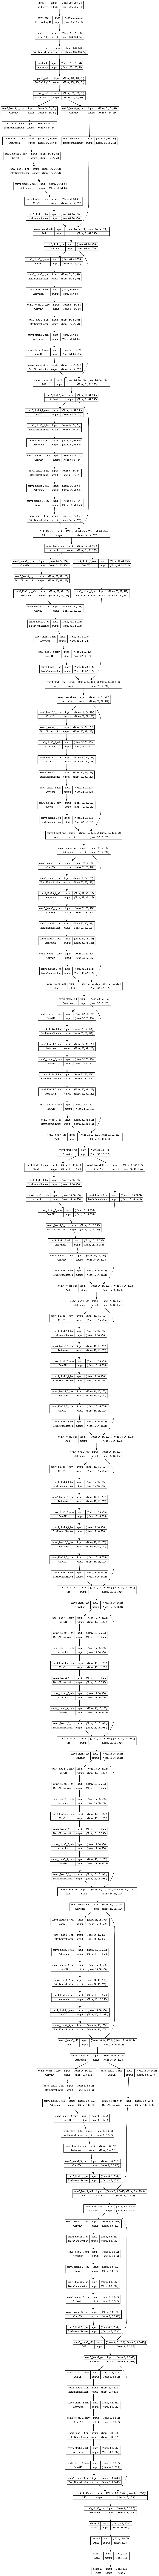

In [ ]:
plot_model(model=model4_resnet_50, show_shapes= True)

In [ ]:
model4_resnet_50.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history4 = model4_resnet_50.fit(x_train, y_train_cat, batch_size = 50, epochs = 10, verbose = 1, validation_data = (x_test, y_test_cat))

Epoch 1/10
15/15 [==============================] - 11s 369ms/step - loss: 42.2168 - acc: 0.6013 - val_loss: 0.4871 - val_acc: 0.8760
Epoch 2/10
15/15 [==============================] - 4s 272ms/step - loss: 0.8906 - acc: 0.9213 - val_loss: 3.3732e-04 - val_acc: 1.0000
Epoch 3/10
15/15 [==============================] - 4s 269ms/step - loss: 0.0040 - acc: 0.9987 - val_loss: 7.1854e-07 - val_acc: 1.0000
Epoch 4/10
15/15 [==============================] - 4s 296ms/step - loss: 1.7978e-05 - acc: 1.0000 - val_loss: 3.1709e-05 - val_acc: 1.0000
Epoch 5/10
15/15 [==============================] - 4s 275ms/step - loss: 4.0253e-05 - acc: 1.0000 - val_loss: 1.3378e-05 - val_acc: 1.0000
Epoch 6/10
15/15 [==============================] - 4s 269ms/step - loss: 8.0402e-06 - acc: 1.0000 - val_loss: 1.5189e-06 - val_acc: 1.0000
Epoch 7/10
15/15 [==============================] - 4s 268ms/step - loss: 1.2385e-06 - acc: 1.0000 - val_loss: 8.3391e-07 - val_acc: 1.0000
Epoch 8/10
15/15 [================

In [ ]:
model4_resnet_50.save('saved_models/model4_resnet_50.hdf5')

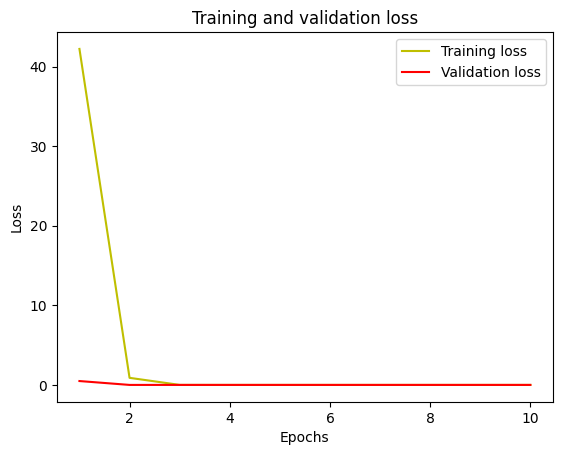

In [ ]:
loss = history4.history['loss']
val_loss_4 = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss_4, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

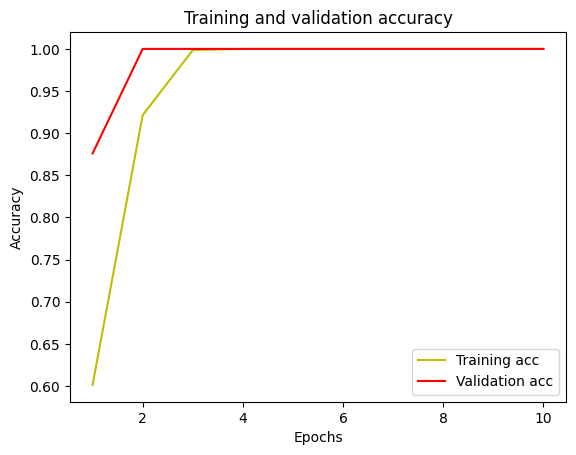

In [ ]:
acc = history4.history['acc']
val_acc_4 = history4.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc_4, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred4_resnet_50 = np.argmax(model4_resnet_50.predict(x_test),axis=-1)

8/8 [==============================] - 4s 276ms/step


In [ ]:
accuracy_Res = accuracy_score(y_test, pred4_resnet_50)
auc_Res = roc_auc_score(y_test,pred4_resnet_50)
se_Res = recall_score(y_test,pred4_resnet_50)

In [ ]:
print('Accuracy Score = ', accuracy_Res*100)
print('AUC = ', auc_Res*100)
print('sensibility = ', se_Res*100)

Accuracy Score =  96.39999999999999
AUC =  96.484375
sensibility =  92.96875


<Axes: >

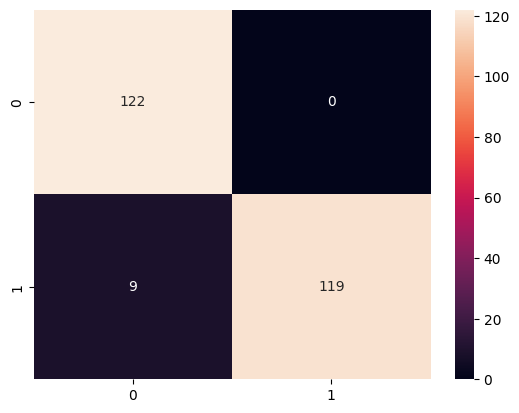

In [ ]:
cm_Res = confusion_matrix(y_test, pred4_resnet_50)
sns.heatmap(cm_Res,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_Res.ravel()

In [ ]:
specificity_Res = tn / (tn + fp)
print(specificity_Res)

1.0


In [ ]:
report_Res = classification_report(y_test,pred4_resnet_50)
print(report_Res)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       122
           1       1.00      0.93      0.96       128

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.97      0.96      0.96       250



Text(0, 0.5, 'Fraction of incorrect predictions')

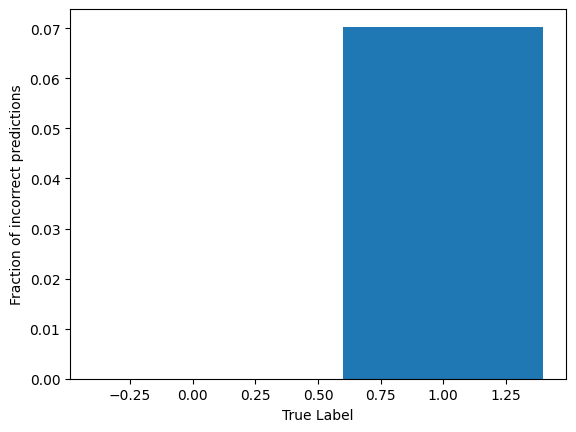

In [ ]:
incorr_fraction = 1 - np.diag(cm_Res) / np.sum(cm_Res, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

#summary

In [ ]:
import pandas as pd

In [ ]:
data = {
    'Model': ['VGG16', 'VGG19', 'Incption_V3', 'ResNet50'],
    'Accuracy': [accuracy_VGG16, accuracy_VGG19, accuracy_v3, accuracy_Res],
    'AUC': [auc_vgg16,auc_vgg19,auc_v3,auc_Res],
    'Sensitivity': [se_vgg16,se_vgg19,se_v3,se_Res],
    'Specificity' :[specificity_vgg16,specificity_vgg19,specificity_v3,specificity_Res]
}

pretrained_table = pd.DataFrame(data)

In [ ]:
pretrained_table.head()

Model  Accuracy       AUC  Sensitivity  Specificity
0        VGG16     1.000  1.000000     1.000000          1.0
1        VGG19     1.000  1.000000     1.000000          1.0
2  Incption_V3     1.000  1.000000     1.000000          1.0
3     ResNet50     0.964  0.964844     0.929688          1.0

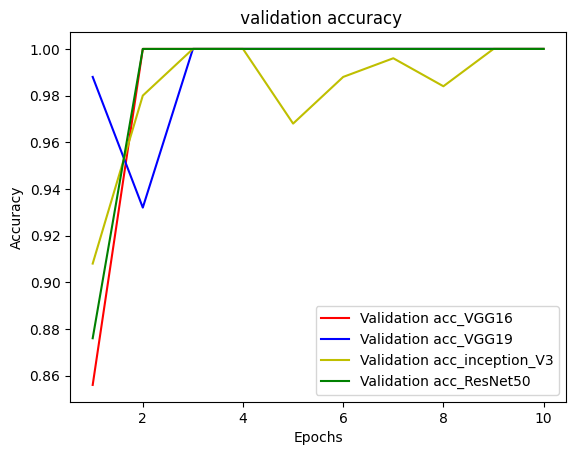

In [ ]:
val_acc1 = history1.history['val_acc']

val_acc_2 = history2.history['val_acc']

val_acc_3 = history3.history['val_acc']

val_acc_4 = history4.history['val_acc']


plt.plot(epochs, val_acc_1, 'r', label='Validation acc_VGG16')
plt.plot(epochs, val_acc_2, 'b', label='Validation acc_VGG19')
plt.plot(epochs, val_acc_3, 'y', label='Validation acc_inception_V3')
plt.plot(epochs, val_acc_4, 'g', label='Validation acc_ResNet50')
plt.title(' validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

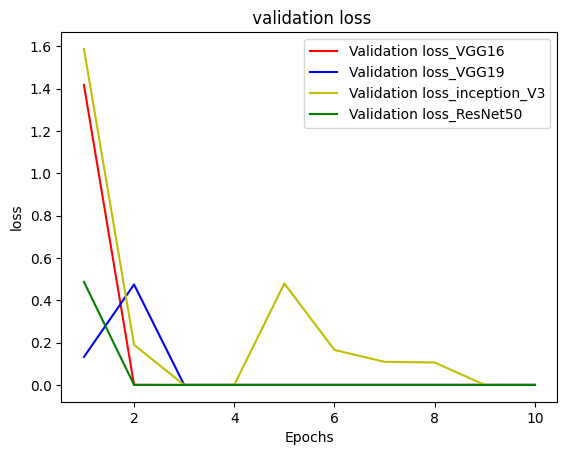

In [ ]:
val_loss_1 = history1.history['val_loss']

val_loss_2 = history2.history['val_loss']

val_loss_3 = history3.history['val_loss']

val_loss_4 = history4.history['val_loss']


plt.plot(epochs, val_loss_1, 'r', label='Validation loss_VGG16')
plt.plot(epochs, val_loss_2, 'b', label='Validation loss_VGG19')
plt.plot(epochs, val_loss_3, 'y', label='Validation loss_inception_V3')
plt.plot(epochs, val_loss_4, 'g', label='Validation loss_ResNet50')
plt.title(' validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#ensembling by average (preds)

In [ ]:
from keras.saving import load_model

In [ ]:
model1 = load_model('saved_models/model_VGG16.hdf5')
model2 = load_model('saved_models/model2_VGG19.hdf5')
model3 = load_model('saved_models/model3_inception_v3.hdf5')
model4 = load_model('saved_models/model4_resnet_50.hdf5')

In [ ]:
models = [model1,model2,model3,model4]

In [ ]:
preds =[model.predict(x_test) for model in models]

8/8 [==============================] - 2s 115ms/step


In [ ]:
preds =np.array(preds)

In [ ]:
preds.shape

(4, 250, 2)

In [ ]:
summed =np.sum(preds,axis=0)

In [ ]:
summed.shape

(250, 2)

In [ ]:
ensemble_prediction = np.argmax(summed,axis=1)

In [ ]:
ensemble_prediction.shape

(250,)

In [ ]:
prediction1 = np.argmax(model1.predict(x_test),axis=-1)
prediction2 = np.argmax(model2.predict(x_test),axis=-1)
prediction3 = np.argmax(model3.predict(x_test),axis=-1)
prediction4 = np.argmax(model4.predict(x_test),axis=-1)

8/8 [==============================] - 1s 110ms/step


In [ ]:
accuracy1_VGG16 = accuracy_score(y_test,prediction1)
accuracy2_VGG19 = accuracy_score(y_test,prediction2)
accuracy3_inception_v3 = accuracy_score(y_test,prediction3)
accuracy4_resnet_50 = accuracy_score(y_test,prediction4)
ensemble_accuracy = accuracy_score(y_test,ensemble_prediction)

In [ ]:
print('Accuracy Score for model1_VGG16 = ', accuracy1_VGG16)
print('Accuracy Score for model2_VGG19 = ', accuracy2_VGG19)
print('Accuracy Score for model3_inceptionV3 = ', accuracy3_inception_v3)
print('Accuracy Score for model4_renet50 = ', accuracy4_resnet_50 )
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1_VGG16 =  1.0
Accuracy Score for model2_VGG19 =  1.0
Accuracy Score for model3_inceptionV3 =  1.0
Accuracy Score for model4_renet50 =  0.964
Accuracy Score for average ensemble =  1.0


In [ ]:
ensemble_auc = roc_auc_score(y_test,ensemble_prediction)
ensemble_se = recall_score(y_test,ensemble_prediction)

In [ ]:
print('auc Score for average ensemble = ', ensemble_auc)
print('SE Score for average ensemble = ', ensemble_se)

auc Score for average ensemble =  1.0
SE Score for average ensemble =  1.0


<Axes: >

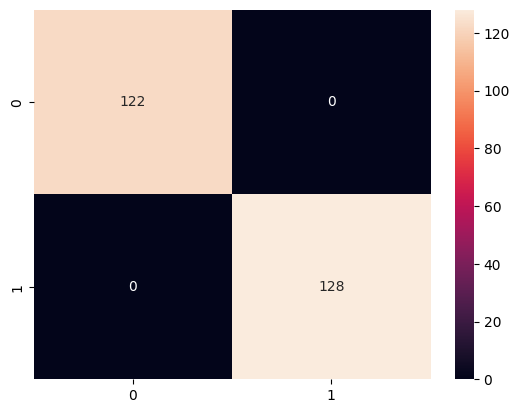

In [ ]:
cm_ensemble = confusion_matrix(y_test,ensemble_prediction)
sns.heatmap(cm_ensemble,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_ensemble.ravel()

In [ ]:
specificity_ensemble = tn / (tn + fp)
print(specificity_ensemble)

1.0


#enhancement Ensemble Lr by adding weighted average ensemble

In [ ]:
models = [model1,model2,model3,model4]

In [ ]:
preds =[model.predict(x_test) for model in models]

8/8 [==============================] - 1s 108ms/step


In [ ]:
preds =np.array(preds)

In [ ]:
preds.shape

(4, 250, 2)

In [ ]:
weights =[0.2, 0.3, 0.3, 0.2]

In [ ]:
weighted_preds = np.tensordot(preds,weights, axes=((0),(0)))

In [ ]:
weights_ensemble_prediction = np.argmax(weighted_preds,axis=1)

In [ ]:
weights_ensemble_prediction.shape

(250,)

In [ ]:
weighted_accuracy = accuracy_score(y_test,weights_ensemble_prediction)

In [ ]:
print('Accuracy Score for model1_VGG6 = ', accuracy1_VGG16)
print('Accuracy Score for model2_VGG19 = ', accuracy2_VGG19)
print('Accuracy Score for model3_inceptionV3 = ', accuracy3_inception_v3)
print('Accuracy Score for model3_resnet50 = ', accuracy4_resnet_50)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1_VGG6 =  1.0
Accuracy Score for model2_VGG19 =  1.0
Accuracy Score for model3_inceptionV3 =  1.0
Accuracy Score for model3_resnet50 =  0.964
Accuracy Score for average ensemble =  1.0
Accuracy Score for weighted average ensemble =  1.0


#enhancement 2 :using grid search for perfect weight

In [ ]:
models = [model1, model2, model3, model4]

In [ ]:
preds1 =[model.predict(x_test) for model in models]

8/8 [==============================] - 1s 109ms/step


In [ ]:
preds1 = np.array(preds1)

In [ ]:
preds1.shape

(4, 250, 2)

In [ ]:
df = pd.DataFrame([])

In [ ]:
for w1 in range(0,5):
  for w2 in range(0,5):
    for w3 in range(0,5):
      for w4 in range(0,5):
        wts = [w1/10.,w2/10.,w3/10.,w4/10.]
        wted_preds1 = np.tensordot(preds,wts,axes=((0),(0)))
        wted_ensemble_pred = np.argmax(wted_preds1,axis=1)
        weighted_accuracy = accuracy_score(y_test,wted_ensemble_pred)
        print("Now predciting for weights :", w1/10., w2/10., w3/10.,w4/10., " : ACC = ", weighted_accuracy)
        df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
                                     'wt4':wts[3],'acc':weighted_accuracy*100},index=[0]),ignore_index=True)


Now predciting for weights : 0.0 0.0 0.0 0.0  : ACC =  0.488
Now predciting for weights : 0.0 0.0 0.0 0.1  : ACC =  0.964
Now predciting for weights : 0.0 0.0 0.0 0.2  : ACC =  0.964
Now predciting for weights : 0.0 0.0 0.0 0.3  : ACC =  0.964
Now predciting for weights : 0.0 0.0 0.0 0.4  : ACC =  0.964
Now predciting for weights : 0.0 0.0 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.2 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.2 0.1  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.2 0.2  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.2 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.2 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.3 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.0 0.3 0.1  

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.0 0.1 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.1 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.2 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.2 0.1  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.2 0.2  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.2 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.2 0.2 0.4  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.3 0.3 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.3 0.4 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.3 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.0 0.3 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.0 0.3 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.3 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.0 0.4 0

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.1 0.0 0.3 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.0 0.3 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.0 0.3 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.0 0.3 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.0 0.4 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.0 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.0 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.0 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.0 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.1 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.1 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.1 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.1 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.1 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.1 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.1 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.1 0.1 0.2  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.1 0.2 0.2 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.2 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.2 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.2 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.3 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.3 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.3 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.3 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.3 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.4 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.2 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.3 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.3 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.3 0.0 0.2  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.1 0.4 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.2 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.2 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.2 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.2 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.2 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.3 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.3 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.3 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.3 0.3  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.3 0.4  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.4 0.0  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.1 0.4 0.4 0.3  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.2 0.1 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.2 0.0  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.2 0.1  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.2 0.2  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.2 0.3  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.2 0.4  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.3 0.0  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.3 0.1  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.3 0.2  : ACC =  1.0
Now predciting for weights : 0.2 0.1 0.3 0.3  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.2 0.3 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.2 0.0  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.2 0.1  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.2 0.2  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.2 0.3  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.2 0.4  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.3 0.0  : ACC =  1.0
Now predciting for weights : 0.2 0.3 0.3 0.1  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.2 0.4 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.2 0.4 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.2 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.2 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.2 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.2 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.0 0.2 0.4  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

0.1 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.1 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.1 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.1 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.2 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.2 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.2 0.2 0.2  : ACC =  1.0
Now predciting for weights : 0

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.3 0.3 0.3 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.3 0.4 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.3 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.3 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.3 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.3 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.3 0.4 0.2 0.0  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.4 0.0 0.3 0.4  : ACC =  1.0
Now predciting for weights : 0.4 0.0 0.4 0.0  : ACC =  1.0
Now predciting for weights : 0.4 0.0 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.4 0.0 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.4 0.0 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.4 0.0 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.1 0.4  : ACC =  1.0
Now predciting for weights : 0.4 0.1 0.2 0.0  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.4 0.2 0.3 0.3  : ACC =  1.0
Now predciting for weights : 0.4 0.2 0.3 0.4  : ACC =  1.0
Now predciting for weights : 0.4 0.2 0.4 0.0  : ACC =  1.0
Now predciting for weights : 0.4 0.2 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.4 0.2 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.4 0.2 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.4 0.2 0.4 0.4  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.0 0.0  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.0 0.1  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.0 0.2  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.0 0.3  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.0 0.4  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.1 0.0  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.1 0.1  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.1 0.2  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.1 0.3  : ACC =  1.0
Now predciting for weights : 0.4 0.3 0.1 0.4  : ACC =  1

<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10:

Now predciting for weights : 0.4 0.4 0.4 0.0  : ACC =  1.0
Now predciting for weights : 0.4 0.4 0.4 0.1  : ACC =  1.0
Now predciting for weights : 0.4 0.4 0.4 0.2  : ACC =  1.0
Now predciting for weights : 0.4 0.4 0.4 0.3  : ACC =  1.0
Now predciting for weights : 0.4 0.4 0.4 0.4  : ACC =  1.0


<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-156-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],


In [ ]:
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[4], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2],"and w4=",max_acc_row[3])

Max accuracy of  100.0  obained with w1= 0.0  w2= 0.0  and w3= 0.1 and w4= 0.0


In [ ]:
models = [model1, model2, model3,model4]

In [ ]:
preds = [model.predict(x_test) for model in models]

8/8 [==============================] - 1s 110ms/step


In [ ]:
preds=np.array(preds)

In [ ]:
ideal_weights = [0.4, 0.3, 0.1,0.2]

In [ ]:
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

In [ ]:
ideal_weighted_ensemble_prediction.shape

(250,)

In [ ]:
ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)
ideal_weighted_auc = roc_auc_score(y_test, ideal_weighted_ensemble_prediction)
ideal_weighted_se = recall_score(y_test, ideal_weighted_ensemble_prediction)

In [ ]:
print('ideal_weighted_accuracy = ',ideal_weighted_accuracy)
print('ideal_weighted_auc = ',ideal_weighted_auc)
print('ideal_weighted_se = ',ideal_weighted_se)

ideal_weighted_accuracy =  1.0
ideal_weighted_auc =  1.0
ideal_weighted_se =  1.0


<Axes: >

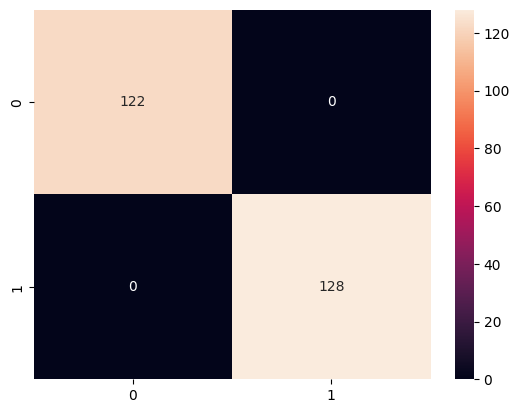

In [ ]:
cm_ideal_weighted = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)
sns.heatmap(cm_ideal_weighted, annot=True, fmt='g')

In [ ]:
tn, fp, fn, tp = cm_ideal_weighted.ravel()

In [ ]:
specificity_ideal_weighted = tn / (tn + fp)
print(specificity_ideal_weighted)

1.0


In [ ]:
report_ideal_weighted = classification_report(y_test, ideal_weighted_ensemble_prediction)
print(report_ideal_weighted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
data = {
    'Model': ['VGG16', 'VGG19', 'Incption_V3', 'ResNet50','ensemble average','weighted ensemble average'],
    'Accuracy': [accuracy_VGG16, accuracy_VGG19, accuracy_v3, accuracy_Res,ensemble_accuracy,ideal_weighted_accuracy],
    'AUC': [auc_vgg16,auc_vgg19,auc_v3,auc_Res,ensemble_auc,ideal_weighted_auc],
    'Sensitivity': [se_vgg16,se_vgg19,se_v3,se_Res,ensemble_se,ideal_weighted_se],
    'Specificity' :[specificity_vgg16,specificity_vgg19,specificity_v3,specificity_Res,specificity_ensemble,specificity_ideal_weighted]
}

pretrained_table = pd.DataFrame(data)

In [ ]:
pretrained_table.head(6)

Model  Accuracy       AUC  Sensitivity  Specificity
0                      VGG16     1.000  1.000000     1.000000          1.0
1                      VGG19     1.000  1.000000     1.000000          1.0
2                Incption_V3     1.000  1.000000     1.000000          1.0
3                   ResNet50     0.964  0.964844     0.929688          1.0
4           ensemble average     1.000  1.000000     1.000000          1.0
5  weighted ensemble average     1.000  1.000000     1.000000          1.0

#VGG16 VGG19 Inception_V3 Resnet features as features extractor one vector

In [ ]:
feature_extractor_VGG16 = model1.predict(x_train)
feature_extractor_VGG19 = model2.predict(x_train)
feature_extractor_inceptionV3 = model3.predict(x_train)
feature_extractor_res50 = model4.predict(x_train)

In [ ]:
feature_extractor_VGG16.shape

(750, 2)

In [ ]:
feature_extractor_VGG19.shape

(750, 2)

In [ ]:
feature_extractor_inceptionV3.shape

(750, 2)

In [ ]:
feature_extractor_res50.shape

(750, 2)

In [ ]:
flatten_feature_extractor_VGG16 = np.array(feature_extractor_VGG16)
flatten_feature_extractor_VGG19 = np.array(feature_extractor_VGG19)
flatten_feature_extractor_inceptionV3 = np.array(feature_extractor_inceptionV3)
flatten_feature_extractor_res50 = np.array(feature_extractor_res50)
#flatten_feature_extractor_VGG16 = feature_extractor_VGG16.flatten()
#flatten_feature_extractor_VGG19 = feature_extractor_VGG19.flatten()
#flatten_feature_extractor_inceptionV3 = feature_extractor_inceptionV3.flatten()
#flatten_feature_extractor_res50 = feature_extractor_res50.flatten()

In [ ]:
x_train_ensemble = np.concatenate([flatten_feature_extractor_VGG16,flatten_feature_extractor_VGG19,flatten_feature_extractor_inceptionV3,
                                   flatten_feature_extractor_res50],axis=-1)

In [ ]:
x_train_ensemble.shape

(750, 8)

In [ ]:
#feature_extractor_VGG166=feature_extractor_VGG16.reshape(feature_extractor_VGG16.shape[0],-1)
#feature_extractor_VGG199=feature_extractor_VGG19.reshape(feature_extractor_VGG19.shape[0],-1)
#feature_extractor_res500=feature_extractor_res50.reshape(feature_extractor_res50.shape[0],-1)

In [ ]:
#features_train=np.array([feature_extractor_VGG16,feature_extractor_VGG19])

In [ ]:
pred_VGG16 = model1.predict(x_test)
pred_VGG19 = model2.predict(x_test)
pred_inceptionV3 = model3.predict(x_test)
pred_res50 = model4.predict(x_test)

8/8 [==============================] - 1s 113ms/step


In [ ]:
pred_VGG16.shape,pred_VGG19.shape,pred_inceptionV3.shape,pred_res50.shape

((250, 2), (250, 2), (250, 2), (250, 2))

In [ ]:
flatten_pred_VGG16 = np.array(pred_VGG16)
flatten_pred_VGG19 = np.array(pred_VGG19)
flatten_pred_inceptionV3 = np.array(pred_inceptionV3)
flatten_pred_res50 = np.array(pred_res50)

In [ ]:
flatten_pred_res50.shape

(250, 2)

In [ ]:
ensemble_preds = np.concatenate((flatten_pred_VGG16,flatten_pred_VGG19,flatten_pred_inceptionV3,
                                 flatten_pred_res50),axis=-1)

In [ ]:
ensemble_preds.shape

(250, 8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_classifier.fit(x_train_ensemble,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
y_pred_RF = rf_classifier.predict(ensemble_preds)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_RF = accuracy_score(y_test, y_pred_RF)
report_RF = classification_report(y_test, y_pred_RF)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
accuracy_RF

1.0

<Axes: >

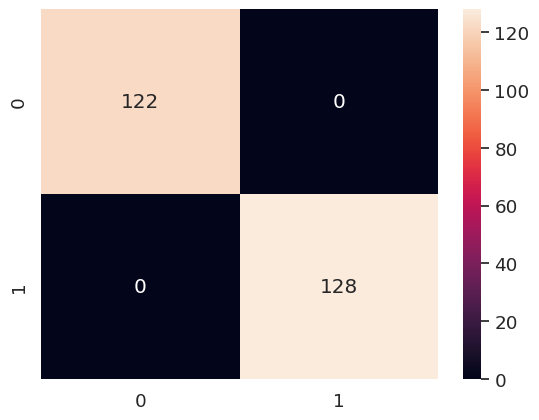

In [ ]:
cm_RF = confusion_matrix(y_test,y_pred_RF)
sns.heatmap(cm_RF,annot=True,fmt='g')

In [ ]:
print(report_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



#VG166,VGG19,Inception_V3,Resnet50 AS features extractor for SVM,SGD,Tree,KNN

```
# Ce texte est au format code
```



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
model_1 = SVC()
model_2 = RandomForestClassifier(n_estimators=20, random_state=42)
model_3 = KNeighborsClassifier(n_neighbors=2)
model_4 = SGDClassifier(random_state=42)

In [ ]:
model_1.fit(x_train_ensemble,y_train)
model_2.fit(x_train_ensemble,y_train)
model_3.fit(x_train_ensemble,y_train)
model_4.fit(x_train_ensemble,y_train)

SGDClassifier(random_state=42)

In [ ]:
y_pred_SVM = model_1.predict(ensemble_preds) #SVM
y_pred_RF = model_2.predict(ensemble_preds) #RF
y_pred_KNN = model_3.predict(ensemble_preds) #KNN
y_pred_SGD = model_4.predict(ensemble_preds) #SGD

In [ ]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_SGD = accuracy_score(y_test, y_pred_SGD)

In [ ]:
print('accuracy of SVM = ',accuracy_SVM)
print('accuracy of RF  = ',accuracy_RF)
print('accuracy of KNN = ',accuracy_KNN)
print('accuracy of SGD = ',accuracy_SGD)

accuracy of SVM =  1.0
accuracy of RF  =  1.0
accuracy of KNN =  1.0
accuracy of KNN =  1.0


In [ ]:
auc_SVM = roc_auc_score(y_test, y_pred_SVM)
auc_RF = roc_auc_score(y_test, y_pred_RF)
auc_KNN = roc_auc_score(y_test, y_pred_KNN)
auc_SGD = roc_auc_score(y_test, y_pred_SGD)

In [ ]:
print('auc of SVM = ',auc_SVM)
print('auc of RF  = ',auc_RF)
print('auc of KNN = ',auc_KNN)
print('auc of SGD = ',auc_SGD)

auc of SVM =  1.0
auc of RF  =  1.0
auc of KNN =  1.0
auc of SGD =  1.0


In [ ]:
se_SVM = recall_score(y_test,y_pred_SVM)
se_RF = recall_score(y_test,y_pred_RF)
se_KNN = recall_score(y_test,y_pred_KNN)
se_SGD = recall_score(y_test,y_pred_SGD)

In [ ]:
print('se of SVM = ',se_SVM)
print('se of RF  = ',se_RF)
print('se of KNN = ',se_KNN)
print('se of SGD = ',se_SGD)

se of SVM =  1.0
se of RF  =  1.0
se of KNN =  1.0
se of SGD =  1.0


In [ ]:
cm_SVM = confusion_matrix(y_test,y_pred_SVM)
cm_RF = confusion_matrix(y_test,y_pred_RF)
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
cm_SGD = confusion_matrix(y_test,y_pred_SGD)

In [ ]:
tn_SVM, fp_SVM, fn_SVM, tp_SVM = cm_SVM.ravel()
tn_RF, fp_RF, fn_RF, tp_RF = cm_RF.ravel()
tn_KNN, fp_KNN, fn_KNN, tp_KNN = cm_KNN.ravel()
tn_SGD, fp_SGD, fn_SGD, tp_SGD = cm_SGD.ravel()

In [ ]:
specificity_SVM = tn_SVM / (tn_SVM + fp_SVM)
specificity_RF = tn_RF / (tn_RF + fp_RF)
specificity_KNN = tn_KNN / (tn_KNN + fp_KNN)
specificity_SGD = tn_SGD / (tn_SGD + fp_SGD)

In [ ]:
print('sp_SVM = ',specificity_SVM)
print('sp_RF = ',specificity_RF)
print('sp_KNN = ',specificity_KNN)
print('sp_SGD = ',specificity_SGD)

sp_SVM =  1.0
sp_RF =  1.0
sp_KNN =  1.0
sp_SGD =  1.0


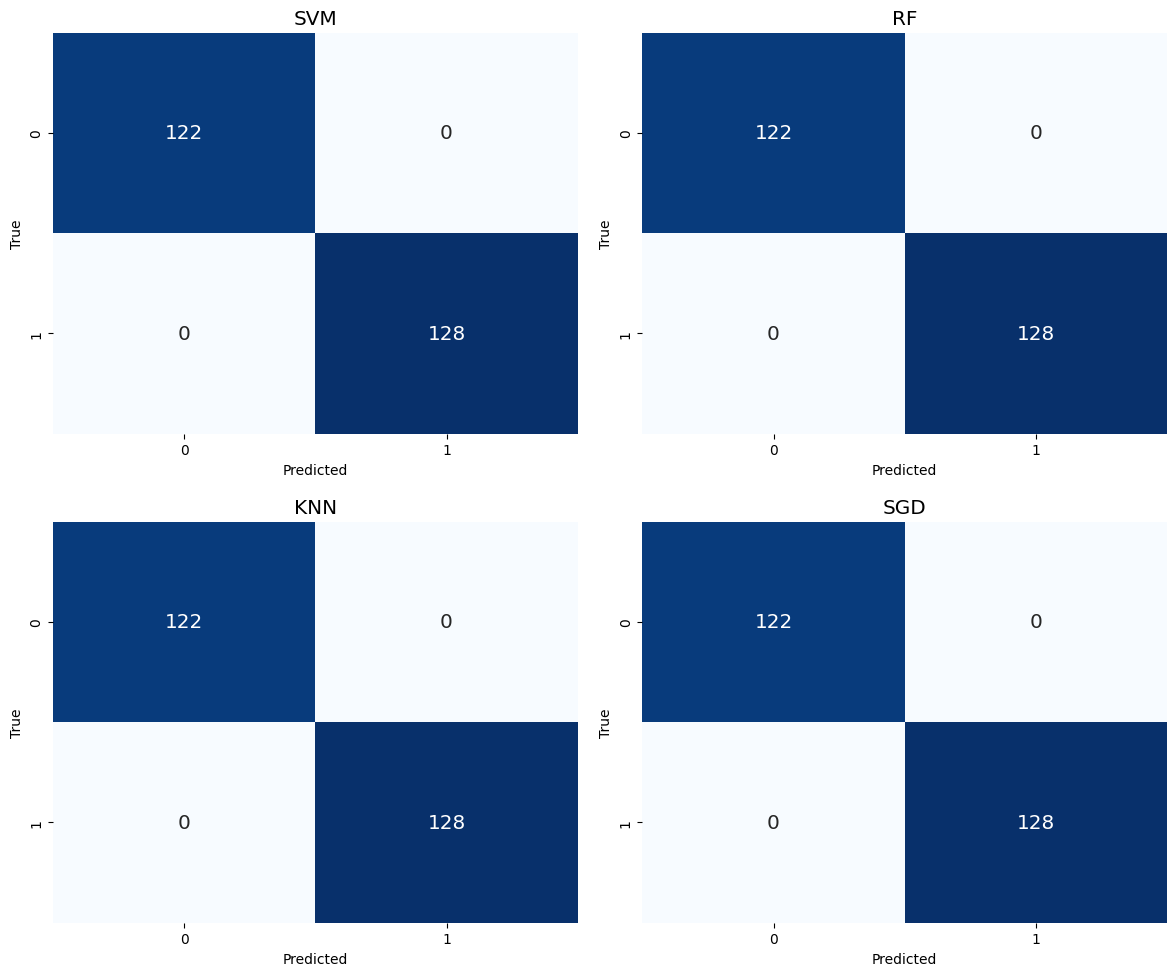

In [ ]:
# Create a list of four confusion matrices (replace these with your actual confusion matrices)
confusion_matrices_list = [cm_SVM, cm_RF, cm_KNN,cm_SGD]
titles = ["SVM", "RF", "KNN","SGD"]

# Determine the number of rows and columns for the subplot grid
rows = 2
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each confusion matrix and plot it with a title
for i in range(len(confusion_matrices_list)):
    ax = axes[i]
    sns.set(font_scale=1.2)  # Adjust font size if needed
    sns.heatmap(confusion_matrices_list[i], annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(titles[i])

# Adjust spacing and display the figure
plt.tight_layout()
plt.show()

In [ ]:
#classification report
report_SVM = classification_report(y_test, y_pred_SVM)
report_RF = classification_report(y_test, y_pred_RF)
report_KNN = classification_report(y_test, y_pred_KNN)
report_SGD = classification_report(y_test, y_pred_SGD)

In [ ]:
print(report_SVM)
print(report_RF)
print(report_KNN)
print(report_SGD)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

              preci

In [ ]:
#plt.figure(figsize=(8, 6))
#sns.set(font_scale=1.2)  # Adjust font size if needed
#sns.heatmap(cm_SVC, annot=True, fmt='d', cmap='Blues', cbar=False)

#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title('Confusion Matrix of SVM')
#plt.show()

In [ ]:
data = {
    'Model': ['SVM', 'RF', 'KNN','SGD'],
    'Accuracy': [accuracy_SVM, accuracy_RF, accuracy_KNN,accuracy_SGD],
    'AUC': [auc_SVM, auc_RF,auc_KNN,auc_SGD],
    'sensibility': [se_SVM,se_RF,se_KNN,se_SGD],
    'specificity':[specificity_SVM,specificity_RF,specificity_KNN,specificity_SGD]
}

data_table = pd.DataFrame(data)

In [ ]:
data_table.head()

Model  Accuracy  AUC  sensibility  specificity
0   SVM       1.0  1.0          1.0          1.0
1    RF       1.0  1.0          1.0          1.0
2   KNN       1.0  1.0          1.0          1.0
3   SGD       1.0  1.0          1.0          1.0

#Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model_voting = VotingClassifier([('SVM',model_1),('RF',model_2),('KNN',model_3),('SGD',model_4)],voting='hard')

In [ ]:
model_voting.fit(x_train_ensemble,y_train)

VotingClassifier(estimators=[('SVM', SVC()),
                             ('RF',
                              RandomForestClassifier(n_estimators=20,
                                                     random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=2)),
                             ('SGD', SGDClassifier(random_state=42))])

In [ ]:
y_pred_Voting = model_voting.predict(ensemble_preds)

In [ ]:
accuracy_Voting = accuracy_score(y_test, y_pred_Voting)
auc_Voting = roc_auc_score(y_test,y_pred_Voting)
se_Voting = recall_score(y_test,y_pred_Voting)

In [ ]:
print('accuracy of voting classifier = ',accuracy_Voting)
print('auc_voting = ',auc_Voting)
print('se_voting = ',se_Voting)

accuracy of voting classifier =  1.0
auc_voting =  1.0
se_voting =  1.0


<Axes: >

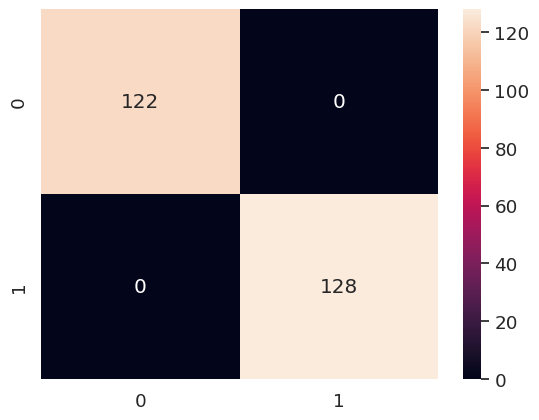

In [ ]:
cm_Voting = confusion_matrix(y_test,y_pred_Voting)
sns.heatmap(cm_Voting,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_Voting.ravel()

In [ ]:
specificity_voting = tn / (tn + fp)
print(specificity_voting)

In [ ]:
report_Voting = classification_report(y_test,y_pred_Voting)

In [ ]:
print(report_Voting)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       122
           1       1.00      0.91      0.95       128

    accuracy                           0.95       250
   macro avg       0.96      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250



#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [ ]:
model_bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10)

In [ ]:
model_bagging.fit(x_train_ensemble,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier())

In [ ]:
y_pred_bagging = model_bagging.predict(ensemble_preds)

In [ ]:
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
auc_bagging = roc_auc_score(y_test,y_pred_bagging)
se_bagging = recall_score(y_test,y_pred_bagging)

In [ ]:
print('accuracy of bagging = ',accuracy_bagging)
print('auc bagging = ', auc_bagging)
print('se bagging = ', se_bagging)

accuracy of bagging =  0.984


<Axes: >

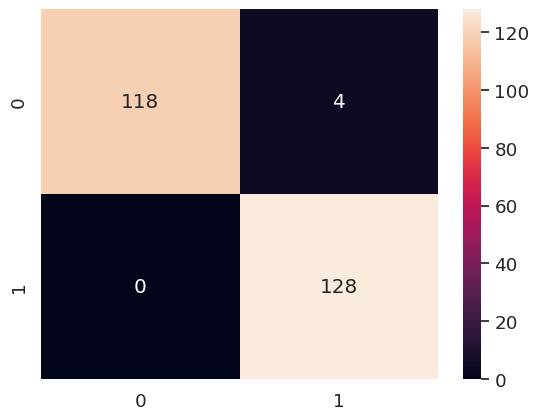

In [ ]:
cm_bagging = confusion_matrix(y_test,y_pred_bagging)
sns.heatmap(cm_bagging,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_bagging.ravel()

In [ ]:
specificity_bagging = tn / (tn + fp)
print(specificity_bagging)

In [ ]:
report_bagging = classification_report(y_test,y_pred_bagging)

In [ ]:
print(report_bagging)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       122
           1       0.97      1.00      0.98       128

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



#Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
model_Adaboost = AdaBoostClassifier(n_estimators=30)

In [ ]:
model_Adaboost.fit(x_train_ensemble,y_train)

AdaBoostClassifier(n_estimators=30)

In [ ]:
y_pred_Boosting = model_Adaboost.predict(ensemble_preds)

In [ ]:
accuracy_Boosting = accuracy_score(y_test, y_pred_Boosting)
auc_Boosting = roc_auc_score(y_test, y_pred_Boosting)
se_Boosting = recall_score(y_test, y_pred_Boosting)

In [ ]:
print('accuracy score of boosting using adaboost = ', accuracy_Boosting)
print('auc score of boosting using adaboost = ', auc_Boosting)
print('sensitivity score of boosting using adaboost = ', se_Boosting)

accuracy score of boosting using adaboost =  0.936


In [ ]:
model_Gboost = GradientBoostingClassifier(n_estimators=30)

In [ ]:
model_Gboost.fit(x_train_ensemble,y_train)

GradientBoostingClassifier(n_estimators=30)

In [ ]:
y_pred_GBoosting = model_Gboost.predict(ensemble_preds)

In [ ]:
accuracy_GBoosting = accuracy_score(y_test, y_pred_GBoosting)
auc_GBoosting = roc_auc_score(y_test, y_pred_GBoosting)
se_GBoosting = recall_score(y_test, y_pred_GBoosting)

In [ ]:
print('accuracy_GBoosting = ', accuracy_GBoosting)
print('auc_GBoosting = ', auc_GBoosting)
print('se_GBoosting = ', se_GBoosting)

accuracy score of boosting using aGradientboostingClassifier =  0.996


<Axes: >

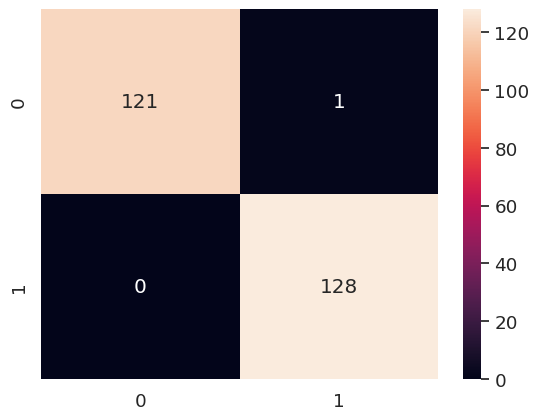

In [ ]:
cm_GBoosting = confusion_matrix(y_test,y_pred_GBoosting)
sns.heatmap(cm_GBoosting,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_GBoosting.ravel()

In [ ]:
specificity_GBoosting = tn / (tn + fp)
print(specificity_GBoosting)

In [ ]:
report_GBoosting = classification_report(y_test,y_pred_GBoosting)

In [ ]:
print(report_GBoosting)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.99      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



#Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
model_Stack = StackingClassifier([('SVM',model_1),('RF',model_2),('KNN',model_3),('SGD',model_4)],final_estimator=RandomForestClassifier())

In [ ]:
model_Stack.fit(x_train_ensemble,y_train)

StackingClassifier(estimators=[('SVM', SVC()),
                               ('SGD', SGDClassifier(random_state=0)),
                               ('Tree', DecisionTreeClassifier(random_state=0)),
                               ('KNN', KNeighborsClassifier(n_neighbors=2))],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_pred_Stack = model_Stack.predict(ensemble_preds)

In [ ]:
accuracy_Stack = accuracy_score(y_test,y_pred_Stack)
auc_Stack = roc_auc_score(y_test,y_pred_Stack)
se_Stack = recall_score(y_test,y_pred_Stack)

In [ ]:
print('accuracy_Stack = ', accuracy_Stack)
print('auc_Stack = ', auc_Stack)
print('se_Stack = ', se_Stack)

<Axes: >

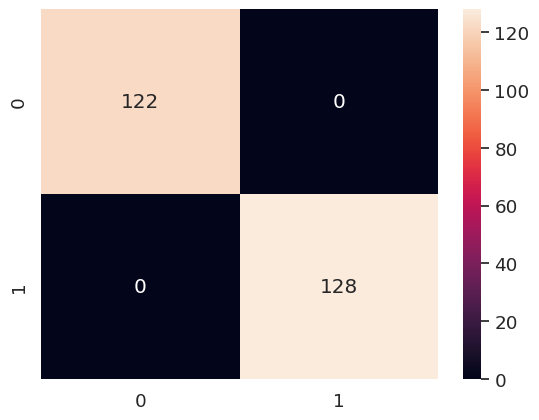

In [ ]:
cm_Stack = confusion_matrix(y_test,y_pred_Stack)
sns.heatmap(cm_Stack,annot=True,fmt='g')

In [ ]:
tn, fp, fn, tp = cm_Stack.ravel()

In [ ]:
specificity_Stack = tn / (tn + fp)
print(specificity_Stack)

In [ ]:
report_Stack = classification_report(y_test,y_pred_Stack)

In [ ]:
print(report_Stack)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       128

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



#accuracy summary

In [ ]:
data = {
    'Model': ['SVM', 'RF', 'KNN','SGD','voting','bagging','boosting','stack'],
    'Accuracy': [accuracy_SVM, accuracy_RF, accuracy_KNN,accuracy_SGD,accuracy_Voting,accuracy_bagging,accuracy_GBoosting,accuracy_Stack],
    'AUC': [auc_SVM, auc_RF,auc_KNN,auc_SGD,auc_Voting,auc_bagging,auc_GBoosting,auc_Stack],
    'sensibility': [se_SVM,se_RF,se_KNN,se_SGD,se_Voting,se_bagging,se_GBoosting,se_Stack],
    'specificity':[specificity_SVM,specificity_RF,specificity_KNN,specificity_SGD,specificity_Voting,specificity_bagging,specificity_GBoosting,specificity_Stack]
}

data_table = pd.DataFrame(data)

In [ ]:
data_table.head(9)